<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Carlos Daniel Pérez Hernández y Juan Pablo Ruiz Magaña.

**Fecha:** 12 de Marxzo del 2021.

**Expediente** : 722627, 721093.
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 7: Clase 13

## Enunciado de tarea (Transcibirlo)
> Descripción de la tarea

### Ejercicio 1: (enunciado)

# Tarea 

Aproxime el valor de la siguiente integral usando el método monte carlo crudo y método de reducción de varianza de muestreo estratíficado

$$I=\int_{0}^{1}x^2\text{d}x=\left.\frac{x^3}{3}\right|_{x=0}^{x=1}=\frac{1}{3}\approx 0.33333$$

Pasos
1. Cree una función que realice el método de muestreo estratíficado, recibiendo como único parámetro de entrada la cantidad de estratos y retornando las variables estratíficadas correspondientes.
2. Reporte los resultados de la aproximación de la integral usando montecarlo crudo y muestreo estratíficado, en un Dataframe con la información mostrada en la siguiente imagen:
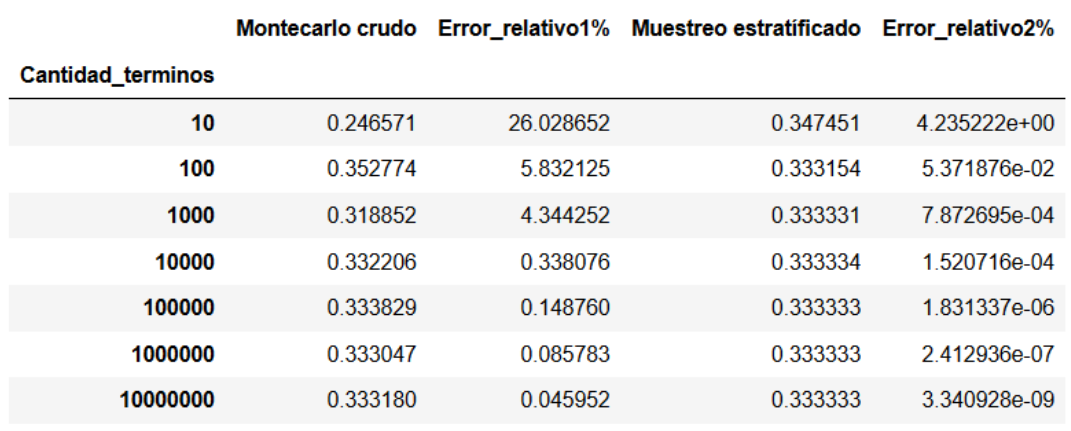

In [ ]:
# Código de solución 
.
.
.
.


### Respuesta planteada en el ejercicio usando (markdown)
 La respuesta es .........

### Respuestas de Juan Pablo:

### `Aproximación por medio de Monte Carlo crudo`

In [8]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline

1. **Se define la función.**

In [83]:
def monte_carlo(a,b,f,u):
    
  
    return ((b-a)/len(u))*np.sum(f(u))

2. Se generan aleatorios uniformemente distribuidos. 

In [155]:
a = 0
b = 1
f = lambda x: x**2
N = np.logspace(1,7,7,dtype=int)
U = [np.random.uniform(0,1,i) for i in N]

3. Se evalua iterativamente los N uniformemente definidos en el método monte carlo crudo.

In [156]:
m_results = [monte_carlo(a,b,f,i) for i in U]

### `Aproximación por medio de Muestreo Estratificado`

1. Se define función de muestreo estratificado que solo reciba como parametro el número de estratos

In [182]:
def m_estrato(N):
    global a,b
    U = np.random.uniform(a,b,N)
    estratos = np.arange(0,N)
    samples = st.uniform.ppf((U+estratos)/N)
    return samples
    

2. Se evaluan los valores uniformemente generados en la función.

In [183]:
samples = [m_estrato(i) for i in N]

In [185]:
estrato_results=[monte_carlo(a,b,f,i) for i in samples]
estrato_results

[0.3311559828881911,
 0.3333622309068786,
 0.33332731447185937,
 0.3333331384033127,
 0.33333332540435895,
 0.3333333334277524,
 0.3333333333468109]

### `Comparación de resultados obtenidos por ambos metodos`

In [187]:
Integral= 1/3
datos = pd.DataFrame(index=N,columns=['Monte Carlo crudo','Error_relativo1%','Muestreo Estratificado','Error_relativo2%'])
datos.index.name='Cantidad terminos'
datos['Monte Carlo crudo'] = m_results
datos["Error_relativo1%"] = np.abs(datos['Monte Carlo crudo']-Integral)*(100/Integral)
datos['Muestreo Estratificado'] = estrato_results
datos["Error_relativo2%"] = np.abs(datos['Muestreo Estratificado']-Integral)*(100/Integral)
datos

,Monte Carlo crudo,Error_relativo1%,Muestreo Estratificado,Error_relativo2%
Cantidad terminos,,,,
10,0.452175,35.652420,0.331156,6.532051e-01
100,0.355186,6.555732,0.333362,8.669272e-03
1000,0.321728,3.481731,0.333327,1.805658e-03
10000,0.331242,0.627269,0.333333,5.847901e-05
100000,0.335157,0.547157,0.333333,2.378692e-06
1000000,0.333144,0.056816,0.333333,2.832573e-08
10000000,0.333397,0.018957,0.333333,4.043282e-09


1. Creación del DataFrame

### Respuestas de Daniel: